In [161]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [162]:
# Load the image
img = cv.imread('image.jpeg', cv.IMREAD_UNCHANGED)
assert img is not None, "File could not be read, check with os.path.exists()"

# Convert the image to grayscale for edge detection
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Use Canny edge detection to find edges
edges = cv.Canny(gray, 100, 200)

# Find contours in the edge image
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

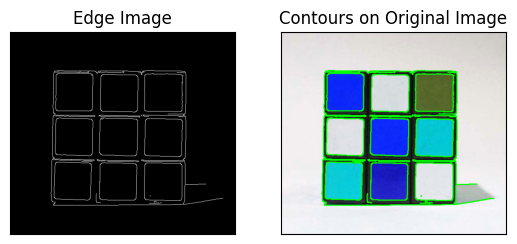

In [163]:
plt.subplot(121)
plt.imshow(edges, cmap='gray')

plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)

plt.imshow(cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 2))
plt.title('Contours on Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [164]:
def extract_colors_within_contours(img, contours):
    # Define the dimensions of the 3x3 grid
    rows = 3
    cols = 3
    cubelet_colors_matrix = np.empty((rows, cols, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            # Get the bounding rectangle for the contour
            x, y, w, h = cv.boundingRect(contours[i * cols + j])

            # Check if the ROI is empty or invalid
            if x >= 0 and y >= 0 and w > 0 and h > 0:
                # Crop the region of interest (ROI) from the original image
                roi = img[y:y+h, x:x+w]

                # Check if the ROI is not empty
                if roi.size > 0:
                    # Calculate the average HSL values within the ROI
                    hsl_roi = cv.cvtColor(roi, cv.COLOR_BGR2HLS)
                    average_hue = np.mean(hsl_roi[:, :, 0])
                    average_saturation = np.mean(hsl_roi[:, :, 1])
                    average_lightness = np.mean(hsl_roi[:, :, 2])

                    cubelet_colors_matrix[i, j, :] = [average_hue, average_saturation, average_lightness]

    return cubelet_colors_matrix

In [165]:
result_mat = extract_colors_within_contours(img, contours)
print(result_mat)

[[[ 93  44   8]
  [120  67   9]
  [ 69 108  52]]

 [[ 46  57  41]
  [113 219  23]
  [ 28 223  34]]

 [[ 28 223  34]
  [ 19 220  38]
  [ 48 109 180]]]
